In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("processed-data.csv")

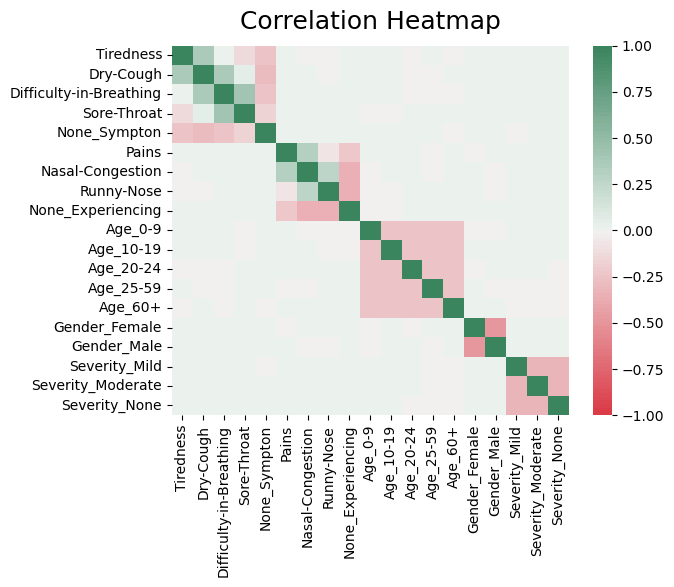

In [3]:
heatmap=sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(10,145,n=100))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [4]:
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [5]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
x = df[['Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity_Mild',
       'Severity_Moderate', 'Severity_None']]
y=df['Tiredness']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.7,random_state=42)

In [7]:
Steps = [
    ('pca',PCA(n_components=.8)),
    ('clf',LogisticRegression())
]
pipe_data = Pipeline(Steps,verbose=1)
pipe_data.fit(x_train,y_train)

c:\Users\thana\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Pipeline] ............... (step 1 of 2) Processing pca, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.2s


Pipeline(steps=[('pca', PCA(n_components=0.8)), ('clf', LogisticRegression())],
         verbose=1)

In [8]:
pipe_data.score(x_test,y_test)

0.6546581890331891